# Subject: Final Assignment - Clustering
# Author: Nguyen Hoai Phuong
# Class: MSE09

## 1- Import important packages

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 2- Dataset

![problem2.png](images/problem2.png)

In [6]:
dataset_dict = {
    'No': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Content': [
        'AABAAABBBAACD',
        'ACDAAABBBCCCD',
        'CCDDDCDDDDDCCC',
        'ABCDEABCDEABCDE',
        'ABCCCCCCCCCCBC',
        'DEADEADDDDDE',
        'BEBBBBEEECBBBC',
        'ABCAAAABBBBBB',
        'AEECDDDDDD',
        'ABCBDDDDDD'
    ]
}
dataset = pd.DataFrame(dataset_dict)
dataset

,No,Content
0,1,AABAAABBBAACD
1,2,ACDAAABBBCCCD
2,3,CCDDDCDDDDDCCC
3,4,ABCDEABCDEABCDE
4,5,ABCCCCCCCCCCBC
5,6,DEADEADDDDDE
6,7,BEBBBBEEECBBBC
7,8,ABCAAAABBBBBB
8,9,AEECDDDDDD
9,10,ABCBDDDDDD


## 3- Vectorize dataset

In [10]:
vectorizer = TfidfVectorizer(analyzer="char")
X = vectorizer.fit_transform(dataset["Content"]).toarray()
vocab = vectorizer.get_feature_names()

In [11]:
vocab

['a', 'b', 'c', 'd', 'e']

In [12]:
X

array([[0.83468824, 0.52375385, 0.1087776 , 0.13093846, 0.        ],
       [0.59634574, 0.49113442, 0.54401558, 0.32742295, 0.        ],
       [0.        , 0.        , 0.52881756, 0.84873552, 0.        ],
       [0.3933659 , 0.43195419, 0.3588475 , 0.43195419, 0.58593763],
       [0.09689159, 0.21279287, 0.97228145, 0.        , 0.        ],
       [0.21945727, 0.        , 0.        , 0.84344932, 0.4903384 ],
       [0.        , 0.81564207, 0.1693994 , 0.        , 0.55320146],
       [0.54259014, 0.83414378, 0.09899542, 0.        , 0.        ],
       [0.13593597, 0.        , 0.1240074 , 0.89562588, 0.40496648],
       [0.14132961, 0.31038743, 0.12892774, 0.9311623 , 0.        ]])

## 4- Apply k-means

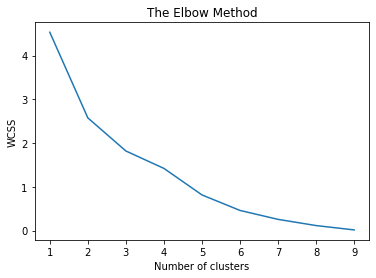

In [17]:
wcss = []
num = 10
for i in range(1,num): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 1, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,num), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Từ đồ thị trên, chúng ta có thể thấy `n_clusters = 5` hoặc `n_clusters = 6` là lựa chọn tốt nhất.

## 4.1 - Số lượng cluster bằng 5

In [69]:
n_clusters = 5
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 0, 2, 3, 4, 2, 1, 4, 0], dtype=int32)

In [72]:
print("clusters center:")
kmeans.cluster_centers_

clusters center:


array([[0.0706648 , 0.15519372, 0.32887265, 0.88994891, 0.        ],
       [0.65787471, 0.61634402, 0.2505962 , 0.15278714, 0.        ],
       [0.19668295, 0.62379813, 0.26412345, 0.21597709, 0.56956954],
       [0.09689159, 0.21279287, 0.97228145, 0.        , 0.        ],
       [0.17769662, 0.        , 0.0620037 , 0.8695376 , 0.44765244]])

In [73]:
print("silhouette_score :", silhouette_score(X, y_kmeans))

silhouette_score : 0.29770943824670415


In [45]:
for cluster in range(n_clusters):
    result = np.where(y_kmeans == cluster)
    print('Cluster %d' %(cluster+1))
    for idx in result[0]:
        print('No ' + str(idx+1) + ' : ' + dataset['Content'][idx])
    print('----------------------------')

Cluster 1
No 3 : CCDDDCDDDDDCCC
No 10 : ABCBDDDDDD
----------------------------
Cluster 2
No 1 : AABAAABBBAACD
No 2 : ACDAAABBBCCCD
No 8 : ABCAAAABBBBBB
----------------------------
Cluster 3
No 4 : ABCDEABCDEABCDE
No 7 : BEBBBBEEECBBBC
----------------------------
Cluster 4
No 5 : ABCCCCCCCCCCBC
----------------------------
Cluster 5
No 6 : DEADEADDDDDE
No 9 : AEECDDDDDD
----------------------------


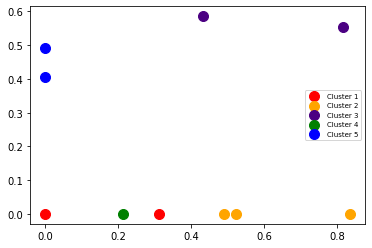

In [60]:
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Cluster 1')  
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 4], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 4], s = 100, c = 'indigo', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 4], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 1], X[y_kmeans == 4, 4], s = 100, c = 'blue', label = 'Cluster 5')
plt.legend(loc=0, numpoints=10, ncol=1, fontsize=7)
plt.show()

## 4.2 - Số lượng cluster bằng 6

In [62]:
n_clusters = 6
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 3, 5, 2, 0, 4, 1, 0, 3], dtype=int32)

In [68]:
print("clusters center:")
kmeans.cluster_centers_

cluster center:


array([[0.17769662, 0.        , 0.0620037 , 0.8695376 , 0.44765244],
       [0.65787471, 0.61634402, 0.2505962 , 0.15278714, 0.        ],
       [0.09689159, 0.21279287, 0.97228145, 0.        , 0.        ],
       [0.0706648 , 0.15519372, 0.32887265, 0.88994891, 0.        ],
       [0.        , 0.81564207, 0.1693994 , 0.        , 0.55320146],
       [0.3933659 , 0.43195419, 0.3588475 , 0.43195419, 0.58593763]])

In [67]:
print("silhouette_score :", silhouette_score(X, y_kmeans))

silhouette_score : 0.24713976988796443


In [64]:
for cluster in range(n_clusters):
    result = np.where(y_kmeans == cluster)
    print('Cluster %d' %(cluster+1))
    for idx in result[0]:
        print('No ' + str(idx+1) + ' : ' + dataset['Content'][idx])
    print('----------------------------')

Cluster 1
No 6 : DEADEADDDDDE
No 9 : AEECDDDDDD
----------------------------
Cluster 2
No 1 : AABAAABBBAACD
No 2 : ACDAAABBBCCCD
No 8 : ABCAAAABBBBBB
----------------------------
Cluster 3
No 5 : ABCCCCCCCCCCBC
----------------------------
Cluster 4
No 3 : CCDDDCDDDDDCCC
No 10 : ABCBDDDDDD
----------------------------
Cluster 5
No 7 : BEBBBBEEECBBBC
----------------------------
Cluster 6
No 4 : ABCDEABCDEABCDE
----------------------------


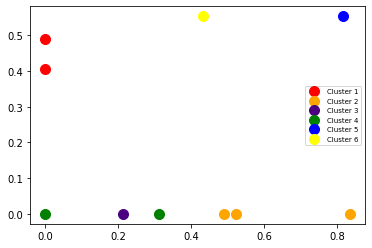

In [65]:
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Cluster 1')  
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 4], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 4], s = 100, c = 'indigo', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 4], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 1], X[y_kmeans == 4, 4], s = 100, c = 'blue', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 1], X[y_kmeans == 4, 4], s = 100, c = 'yellow', label = 'Cluster 6')
plt.legend(loc=0, numpoints=10, ncol=1, fontsize=7)
plt.show()